#### 第六章 第二次上机实验

In [1]:
import numpy as np, matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## 练习6.1:随机游走

In [2]:
def random_walk_trace(n = 1000):
    """
    生成长度为n的随机游走轨迹序列
    input:
        n: 随机行走的步数
    output: 随机行走轨迹的x,y坐标数组
    """
    #np.random.seed(100) #设置随机种子
    x_step = np.random.choice([-1,1],n)
    y_step = np.random.choice([-1,1],n)
    return(x_step.cumsum(), y_step.cumsum())

### (a) 生成一个1000步的随机游走轨迹

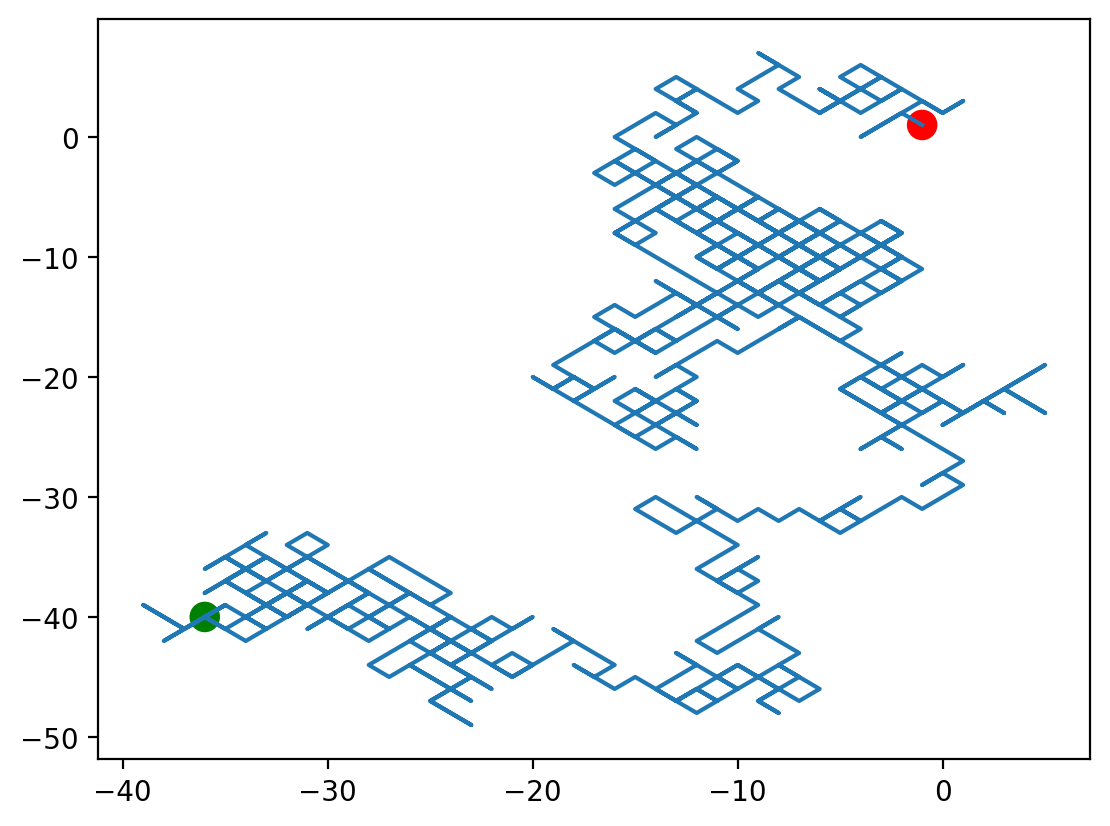

In [3]:
x_trace, y_trace = random_walk_trace()
plt.plot(x_trace,y_trace)  #画随机行走轨迹
plt.scatter([x_trace[0], x_trace[-1]], [y_trace[0], y_trace[-1]], 
            s = 100, color = ['r', 'g']) #画起点和终点

### (b) 生成4个1000步的随机游走，并画出轨迹

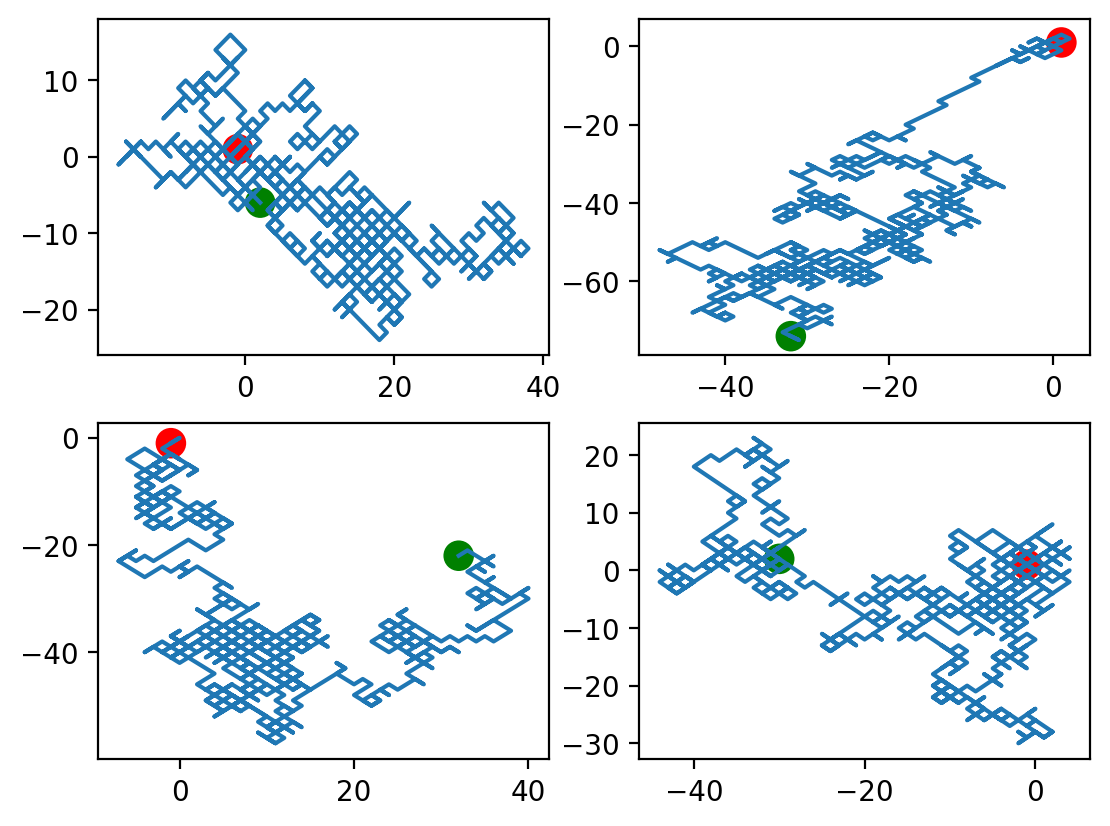

In [5]:
for i in range(4):
    x_trace, y_trace = random_walk_trace()  #调用函数生成1000步的随机游走
    plt.subplot(2,2,i+1)
    plt.plot(x_trace,y_trace)              #画轨迹线
    plt.scatter([x_trace[0], x_trace[-1]], [y_trace[0], y_trace[-1]], 
            s = 100, color = ['r', 'g']) #画起点和终点
    #plt.axis('equal')

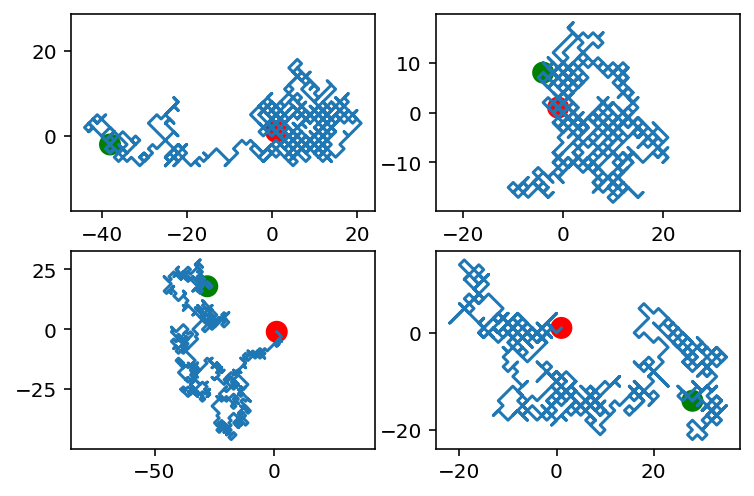

In [6]:
fig, axes = plt.subplots(2,2) #创建2x2共4个画图对象赋给axes
for i in axes.ravel(): #axes是一个2x2的数组，所以需要展平成一维数组
    x_trace, y_trace = random_walk_trace()  #调用函数生成1000步的随机游走
    ax.plot(x_trace,y_trace)              #画轨迹线
    ax.scatter([x_trace[0], x_trace[-1]], [y_trace[0], y_trace[-1]], 
            s = 100, color = ['r', 'g']) #画起点和终点
    ax.axis('equal')

### 6.2 绘制位移分布

In [33]:
def walk_finals(m = 1000, n = 1000):
    """
    产生m个n步的随机游走的终点位置x,y
    """
    x_finals = np.zeros(m)
    y_finals = np.zeros(m)
    for i in range(m):
        #x, y = random_walk_trace(n)
        #x_finals[i], y_finals[i] = x[-1],y[-1]
        x_finals[i] = np.sum(np.random.choice([-1,1],n))
        y_finals[i] = np.sum(np.random.choice([-1,1],n))
    return (x_finals,y_finals)

#### 任务(a): 生成1000个1000步的随机行走，绘制终止点的散点图

In [3]:
x_finals, y_finals = walk_finals()  #1000个1000步的随机游走的终点位置
displacement = np.sqrt(x_finals**2+y_finals**2) #产生1000个位移

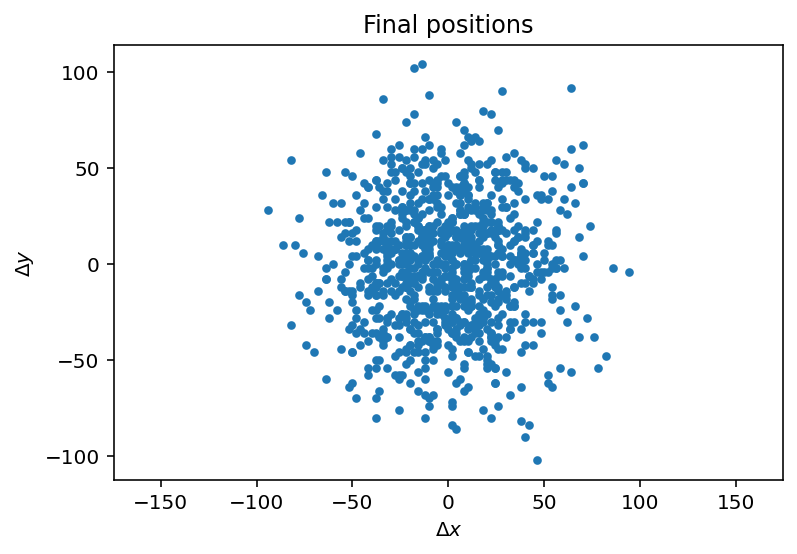

In [4]:
plt.scatter(x_finals,y_finals,s=11)
plt.xlabel("$\Delta x$")
plt.ylabel("$\Delta y$")
plt.title("Final positions")
_ = plt.axis('equal')

$x$终点位置为样本空间是[-1,1]所产生的样本量为1000的随机序列求和，随机序列$X$的分布律为:

  |X|-1|1|
  |---|---|---| 
  |p|0.5|0.5|
  
所以可以求出$X$的数学期望和方差分别为: $$E(X) = \mu_0=0, D(X) = \sigma^2_0=\bar{X^2}-\bar{X}^2=1.$$

根据独立同分布的中心极限定理，1000个随机变量的和的分布服从 $N(n\mu_0, n\sigma_0^2)$, 即$N(0,n)$, 其概率密度函数为

$$f(x)=\frac{1}{\sqrt{2\pi }\sigma}\exp(-\frac{x^2}{2\sigma^2}),$$
其中$\sigma=\sqrt{n}$

#### 直接用数组运算代替循环，实现1000次1000步随机行走 （解法来自2020级天文陈品健）

(-121.6, 133.6, -104.5, 126.5)

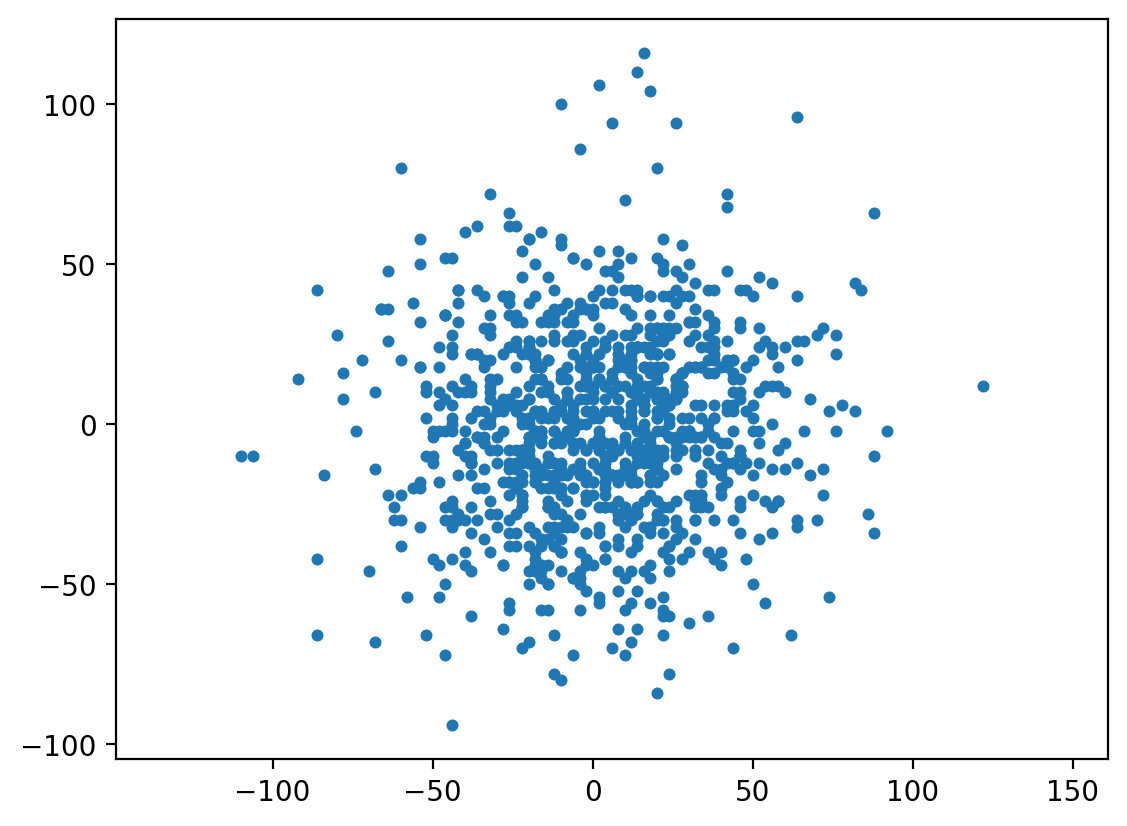

In [9]:
x = np.random.choice([-1,1],size=(1000,1000)).sum(axis=1)
y = np.random.choice([-1,1],size=(1000,1000)).sum(axis=1)
plt.scatter(x,y,s=11)
plt.axis('equal')

(-107.3, 97.3, -99.4, 107.4)

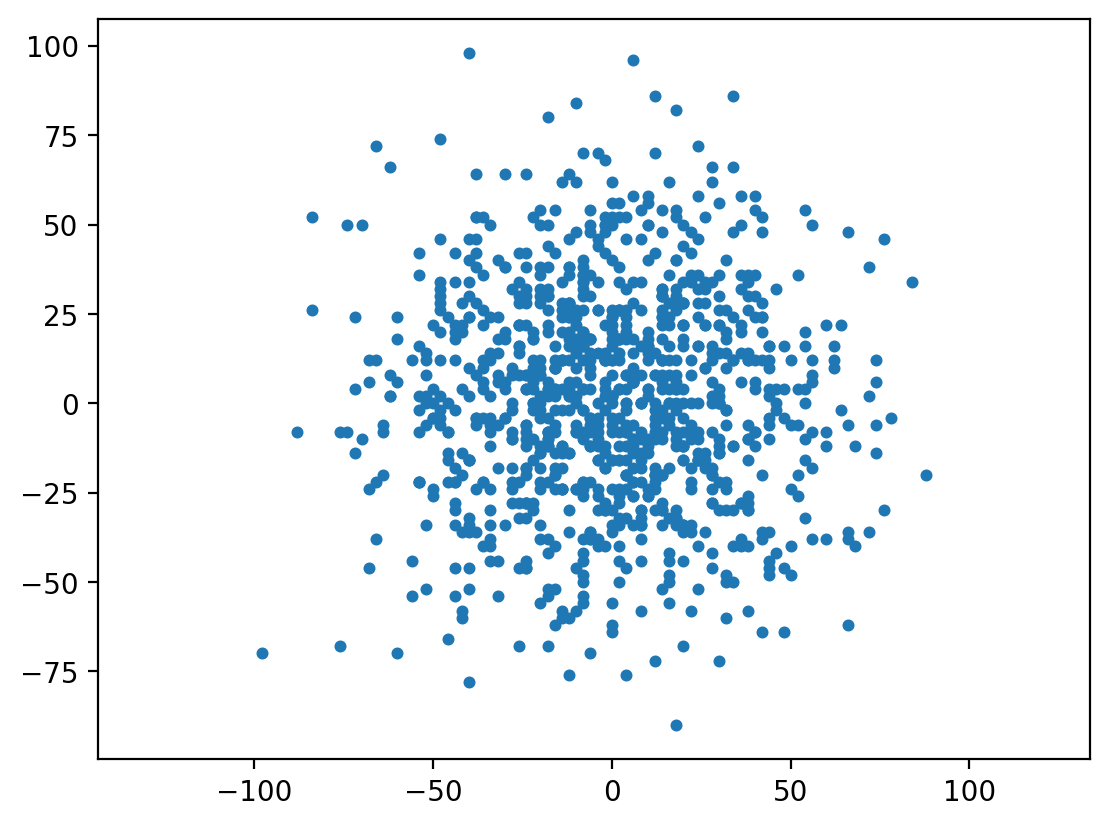

In [10]:
x2 = np.random.choice([-1,1],size=(2,1000,1000)).sum(axis=2) 
plt.scatter(x2[0],x2[1],s=11)
plt.axis('equal')

Text(0, 0.5, 'Density')

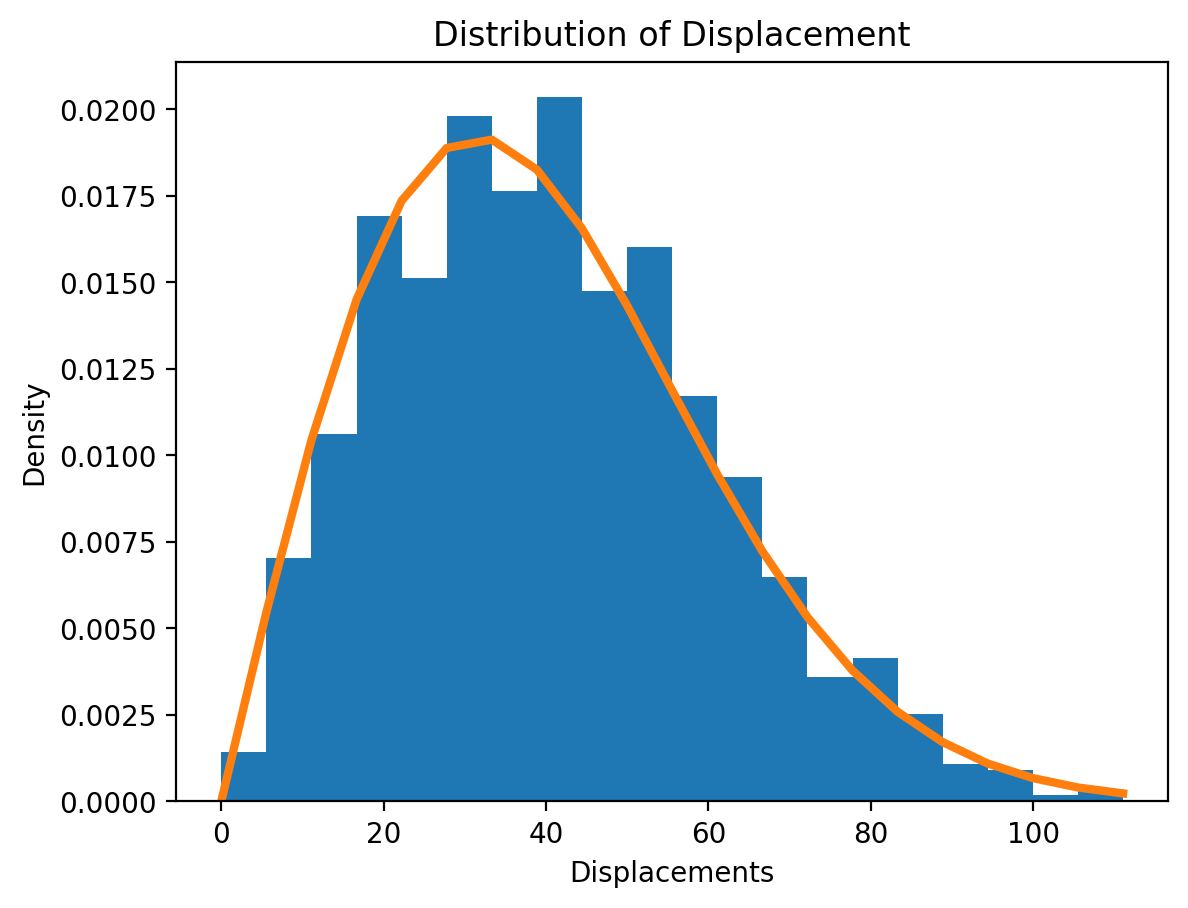

In [11]:
n_steps = 1000
x = np.random.choice([-1,1],size=(2,n_steps,n_steps)).sum(axis=2) 
d = np.sqrt(x[0]**2+x[1]**2)
counts, bins, _ = plt.hist(d, bins=20, density=True) #位移直方图

pdf = bins/n_steps*np.exp(-bins**2/(2*n_steps))  #概率密度函数

plt.plot(bins,pdf,lw=3)

plt.title("Distribution of Displacement")
plt.xlabel("Displacements")
plt.ylabel("Density")

### (b) 用plt.hist绘制一个位移的直方图

随机变量$X$和$Y$的概率密度函数都服从 $f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp\big(-\frac{x^2}{2\sigma^2}\big), \sigma=\sqrt{n}\sigma_0=\sqrt{n}$. 

又因为$x,y$相互独立，所以有联合概率密度
$f(x,y)=\frac{1}{2\pi\sigma^2}\exp\big(-\frac{x^2+y^2}{2\sigma^2}\big)$

化为极坐标形式, 令$r=\sqrt{x^2+y^2}$, 得到
$$f(x,y)dxdy=\frac{1}{2\pi\sigma^2}\exp\big({-\frac{r^2}{2\sigma^2}}\big)rdrd\varphi$$

因为与$\varphi$无关，所以可以把$\varphi$积分和$2\pi$消掉,

$$f(r)dr =\frac{1}{\sigma^2}\exp\big({-\frac{r^2}{2\sigma^2}}\big)rdr$$

得到位移$r$的概率密度为
$$f(r)=\frac{r}{\sigma^2}\exp\big(-\frac{r^2}{2\sigma^2}\big), r\in(0, \infty),$$ 

这是一个瑞利分布, $\sigma=\sqrt{n}$, 所以概率密度函数可化为
$$f(r)=\frac{r}{n}\exp\big(-\frac{r^2}{2n}\big), r\in(0, \infty)$$

### (c) 绘制一个displacement**2的直方图

Text(0, 0.5, 'Density')

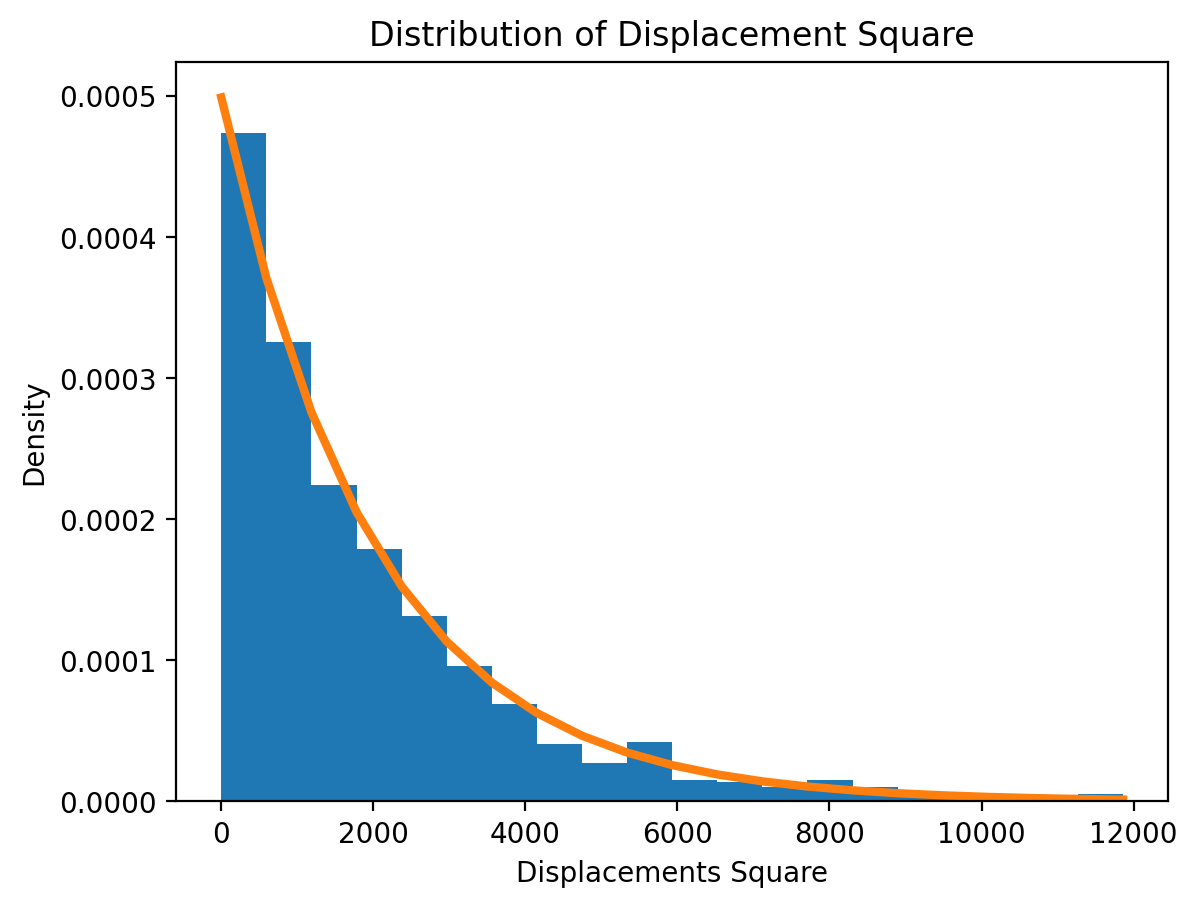

In [18]:
n_steps = 1000
x = np.random.choice([-1,1],size=(2,n_steps,n_steps)).sum(axis=2) 
d = x[0]**2+x[1]**2
dist, bins, _ = plt.hist(d, bins=20, density=True)

pdf = 1/(2*n_steps) * np.exp(-bins/(2*n_steps))
plt.plot(bins,pdf,lw=3)

plt.title("Distribution of Displacement Square")
plt.xlabel("Displacements Square")
plt.ylabel("Density")

平方位移$R = r^2$的分布为
$F_R(R) = P(r^2<R) = P(0<r<\sqrt{R}) = F_r(\sqrt{R})-F_r(0)$

对上式两边求导数

$f_R(R)=\frac{1}{2\sqrt{R}}f_r(\sqrt{R})$


将$f(r)$代入有
$f_R(R)=\frac{1}{2\sqrt{R}}\bigg(\frac{\sqrt{R}}{\sigma^2}\exp\big(-\frac{R}{2\sigma^2}\big)\bigg)$

化简得
$$f_R(R)=\frac{1}{2\sigma^2}\exp\big(-\frac{R}{2\sigma^2}\big),$$
这里$\sigma=\sqrt{n}$, 即：均方位移服从**指数分布**。

### (e) 尝试分别采用半对数和双对数坐标绘图

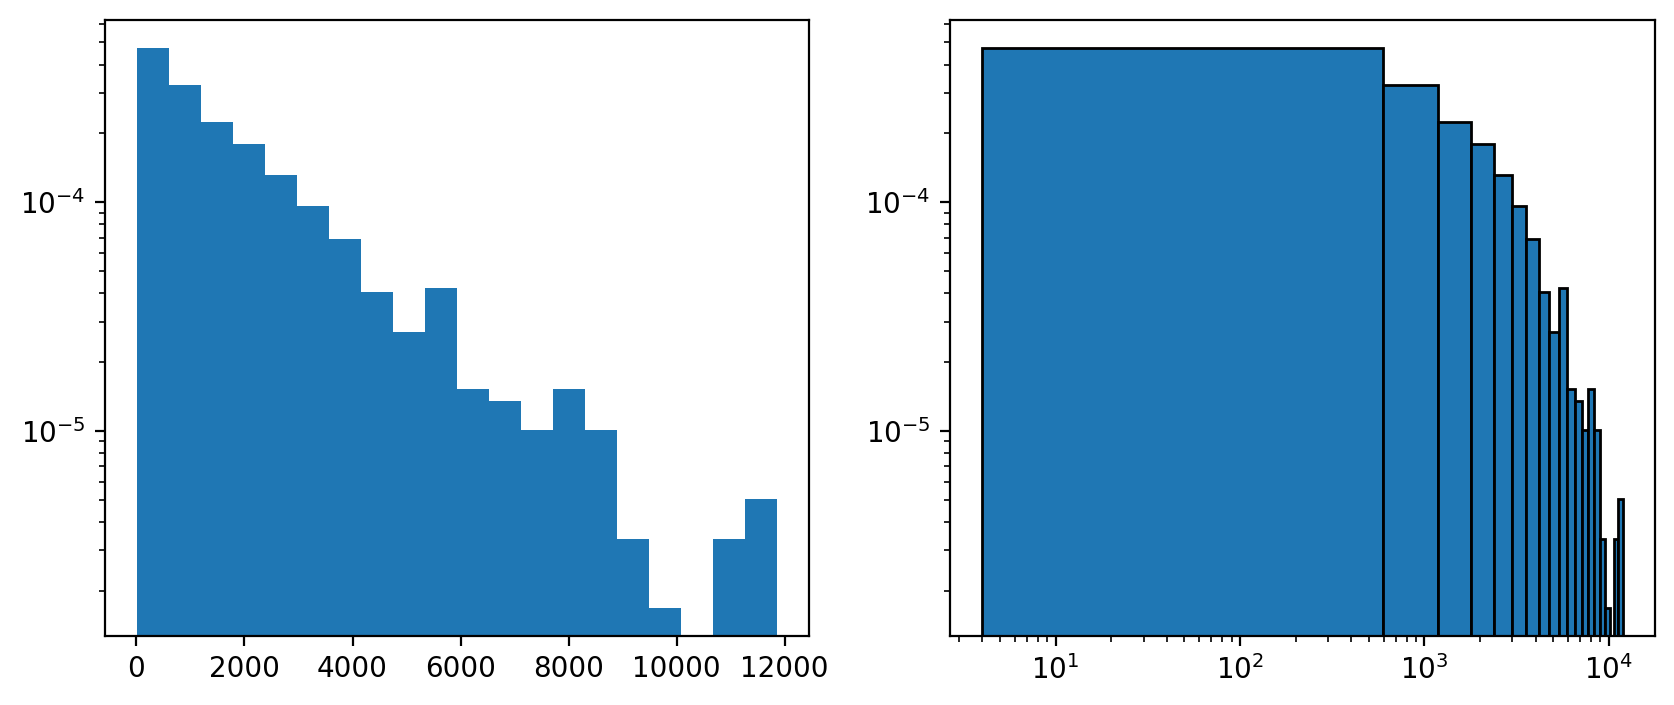

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.semilogy() #半对数坐标
counts, bins, _ = plt.hist(d, bins=20, density=True)
plt.subplot(1,2,2)
plt.loglog() #全对数坐标
dist, bins, _ = plt.hist(d, bins=20, density=True,edgecolor='k')

### (f) 随机游走的步数和均方位移之间的关系

    分别研究1000，2000，3000，4000步随机行走和均方位移之间的关系

(1000,)
(1000,)
(1000,)
(1000,)


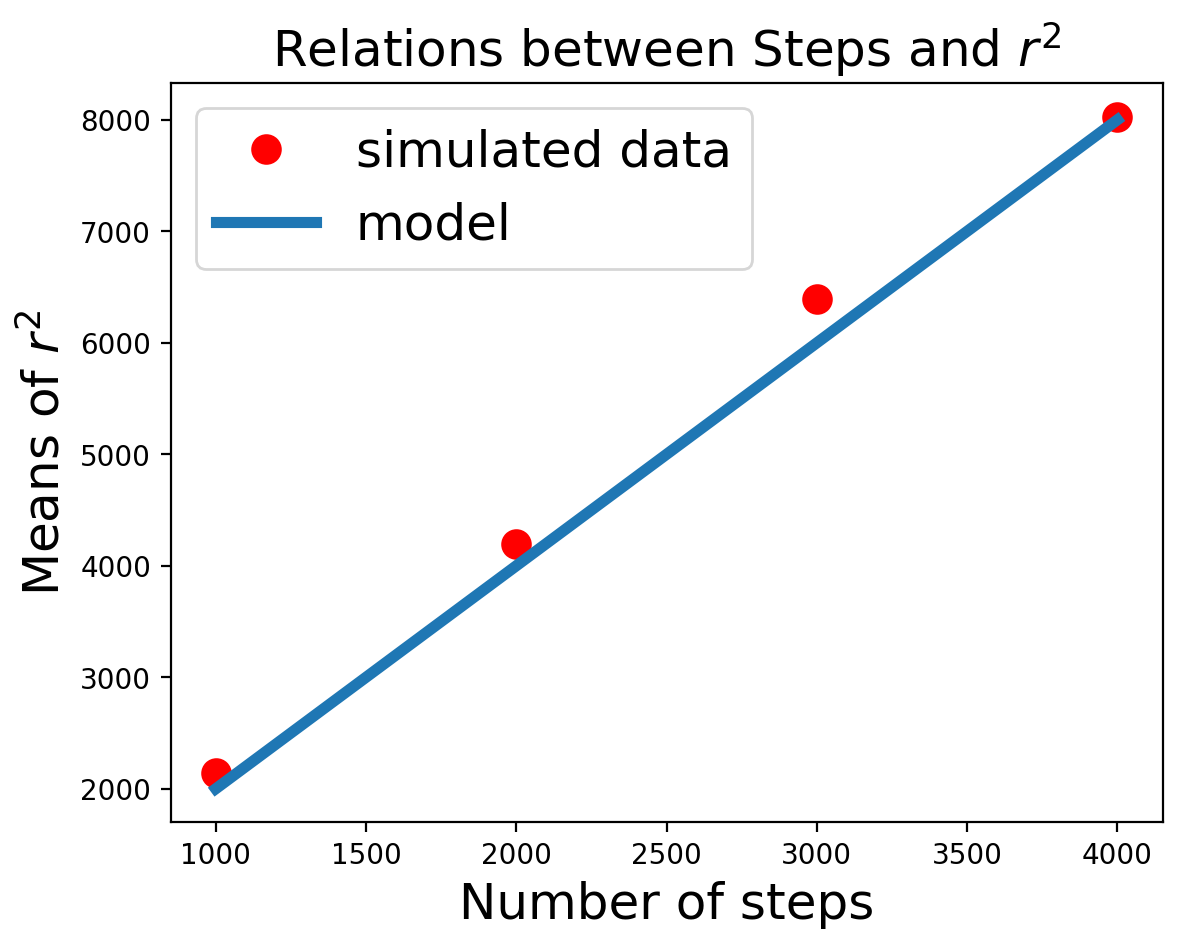

In [35]:
steps = np.array([1000,2000,3000,4000])
mean_displace = []
for i in steps:
    x_finals,y_finals = walk_finals(n=i) #分别生成1000，2000，3000，4000步的随机行走
    ds = x_finals**2+y_finals**2
    print(ds.shape)
    mean_displace.append(np.mean(ds))

plt.plot(steps,mean_displace,'ro',ms=10,label='simulated data')
plt.plot(steps, 2*steps, label='model',lw=4)

plt.xlabel('Number of steps',fontsize='18')
plt.ylabel('Means of $r^2$',fontsize='18')
plt.title('Relations between Steps and $r^2$',fontsize='18')
plt.legend(fontsize='18')

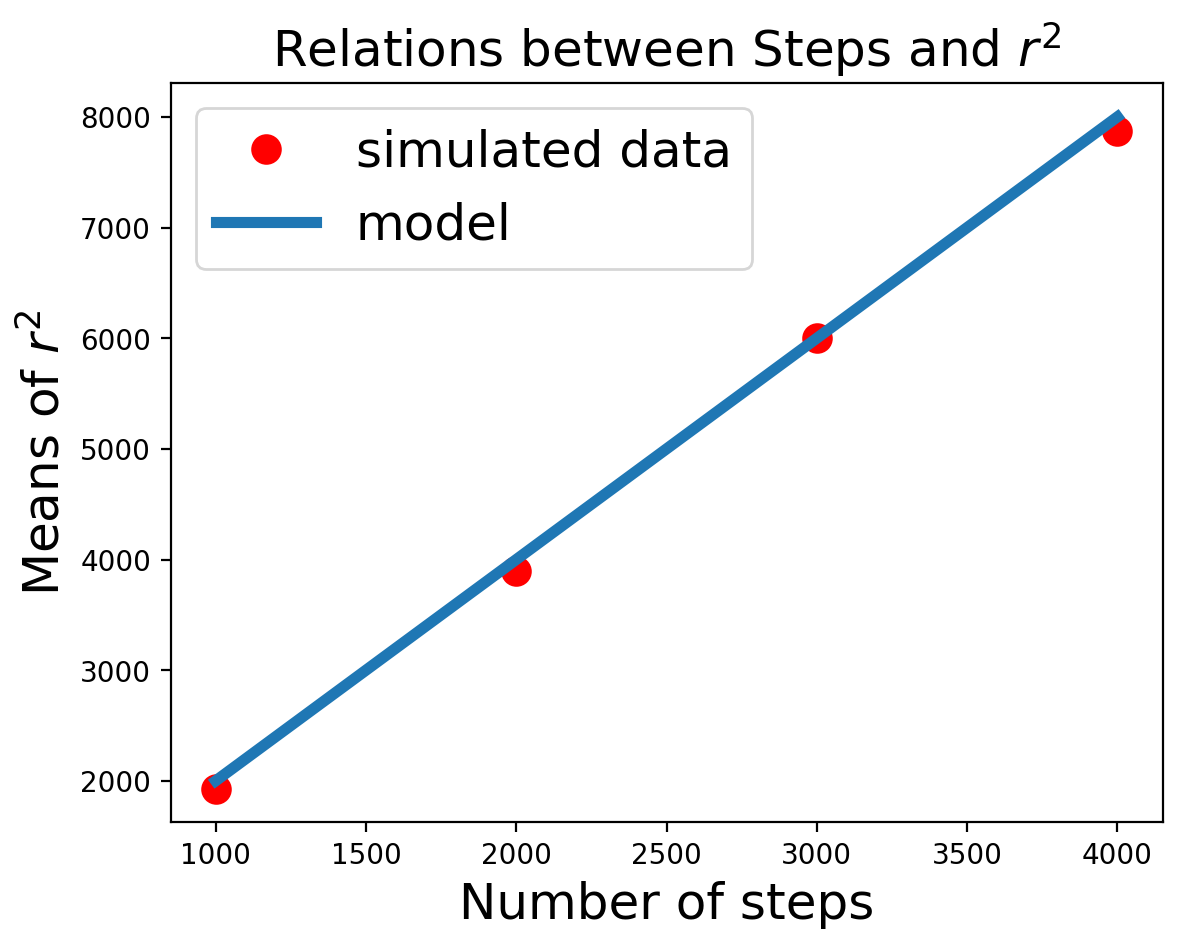

In [37]:
steps = np.array([1000,2000,3000,4000])
mean_displace = []
n_steps = 1000

for i in steps:
    x = np.random.choice([-1,1],size=(2,n_steps,i)).sum(axis=2) 
    ds = x[0]**2+x[1]**2
    mean_displace.append(np.mean(ds))

plt.plot(steps,mean_displace,'ro',ms=10,label='simulated data')
plt.plot(steps, 2*steps, label='model',lw=4)

plt.xlabel('Number of steps',fontsize='18')
plt.ylabel('Means of $r^2$',fontsize='18')
plt.title('Relations between Steps and $r^2$',fontsize='18')
plt.legend(fontsize='18')

所以随机行走的步数$N$和平方位移$r^2$之间的关系是$r^2\simeq 2N$

## 6.3 少见事件

### 6.3.1 泊松分布

抛不公平硬币, 正面朝上的概率是0.08, 抛100枚硬币, 
根据泊松分布的定义$\lambda=0.08\times100=8$, 泊松分布的公式为

$$p(l) = \frac{8^l e^{-8}}{l!}$$

#### (a) 取一些$l$，对$p(l) = \frac{e^{-8}\bullet 8^l}{l!}$画图

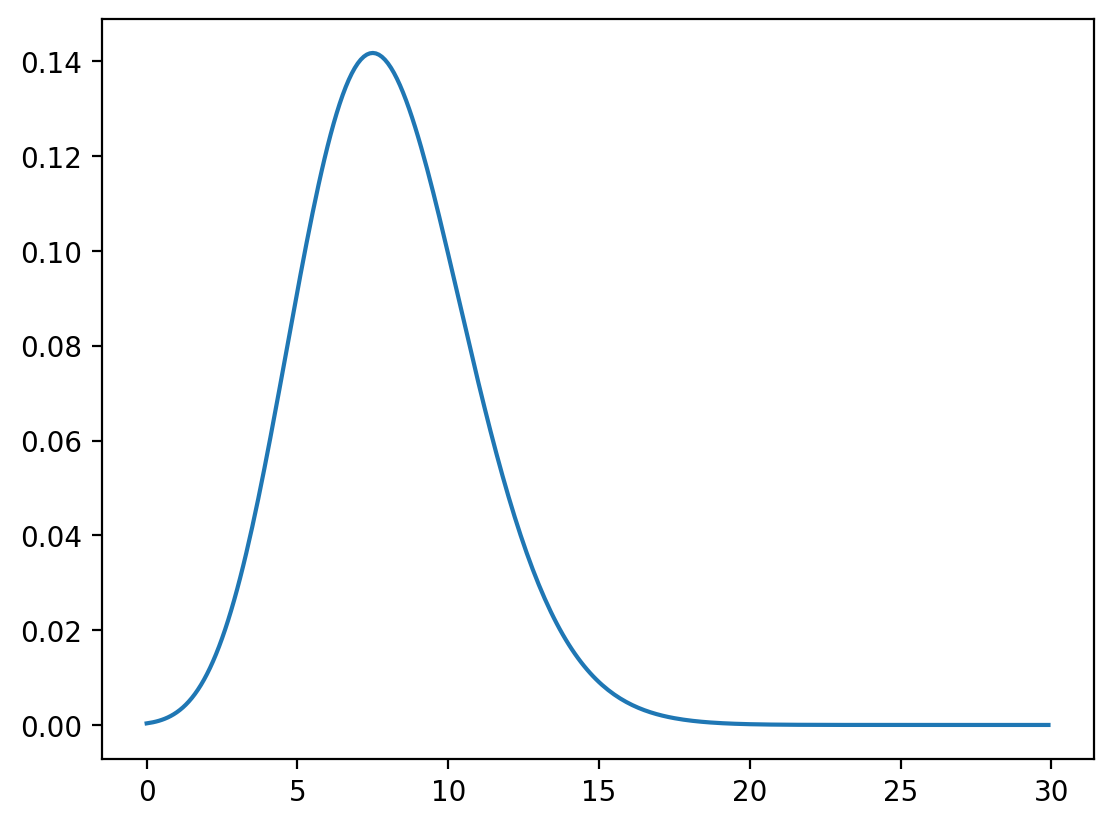

In [56]:
from scipy.special import factorial

l = np.arange(0,30.,0.1) #l取0到29
def poisson(l): #函数产生poisson分布序列
    return np.exp(-8)*8**l/factorial(l)
plt.plot(l,poisson(l))

#### (b) 运行N组抛硬币实验，每组抛硬币100次，且100次中正面朝上的概率为8%

##### 用循环实现

In [57]:
N=10000
n0 = 100
Ms = []  #记录硬币正面朝上的次数
for i in range(N):
    coins = np.random.choice([0,1],n0, p=[0.92,0.08]) #抛硬币100次
    Ms.append(coins.sum())

##### 直接产生二维随机数组

In [58]:
Ms = np.random.choice([0,1],(n0,N), p=[0.92,0.08]).sum(axis=0)
Ms.size

10000

#### (c) 统计每组实验中正面次数M. 用plt.hist画图

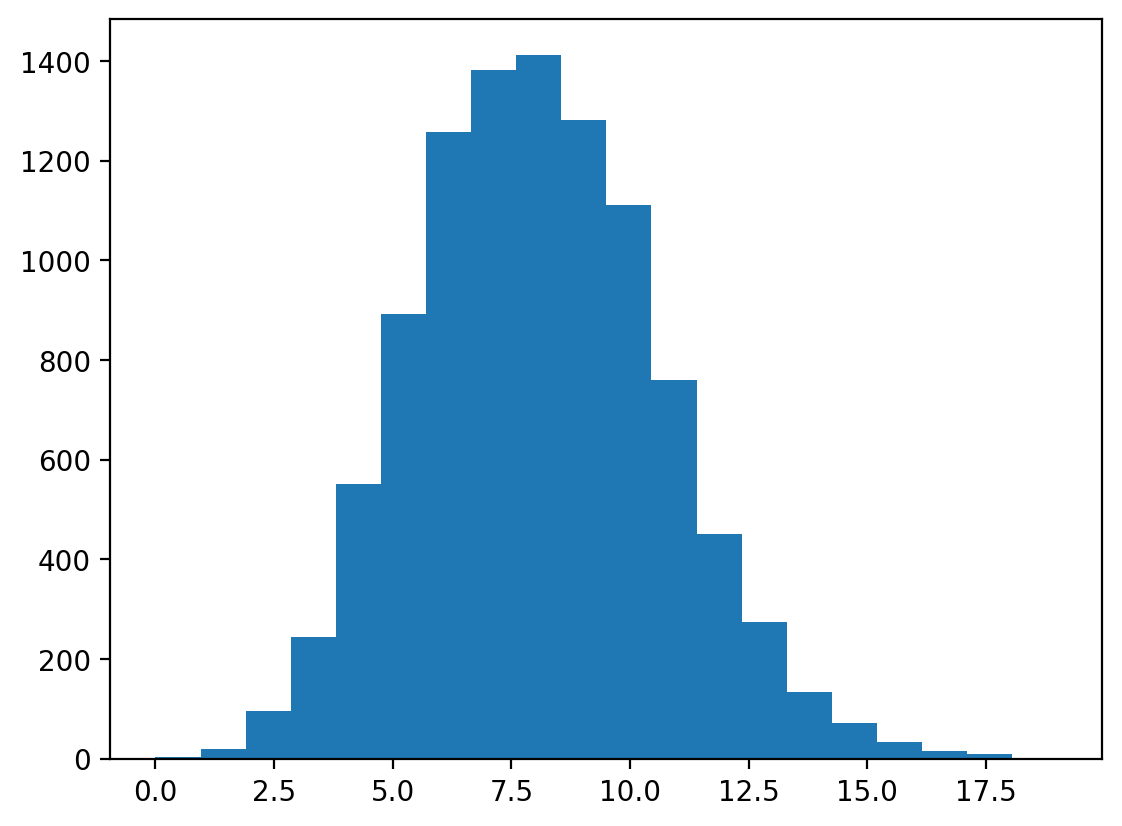

In [59]:
_ = plt.hist(Ms, bins=20)

#### (d) 对公式（6.2）乘以N, 绘制泊松分布图形，输出可能如何？

使用(c)中所绘制的直方图，在同一坐标轴上绘制这个图形

分组原则：每组数目不能太少，避免出现组内数目为零的情况

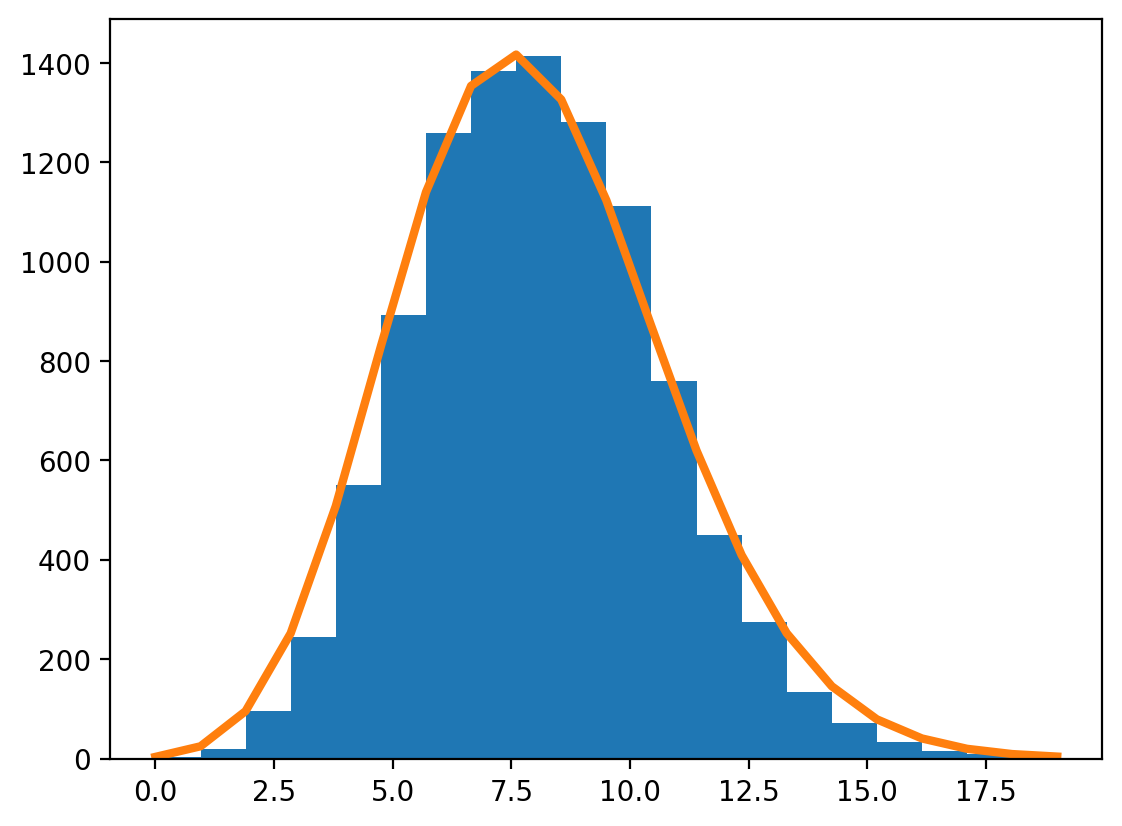

In [60]:
counts, bins_edges, _ = plt.hist(Ms, bins=20)#,density=True) #画分布直方图
plt.plot(bins_edges, N*poisson(bins_edges),lw=3)  #画poisson分布曲线

### 6.3.2 等待时间

如果每秒抛一次硬币, 那么由硬币的正反面组成的随机序列构成了一个**泊松过程**. 
那么在[0,$t$]时间内正面发生的概率可以用下面的公式描述:
    
$$P[N(t)=k] = \frac{(\lambda t)^k}{k!}e^{-\lambda t}, k=0,1,2,\cdots.$$

其中 $\lambda$ 是正面朝上的**平均发生率**, 单位是次/秒. 

在6.3.1的例子中, 
 可以认为$t=100秒$, 而$\lambda=0.08$, 

 所以有$\lambda t = np = 8$. 和6.3.1中的公式(6.2)一致.

#### (a) 模拟泊松过程, 构建一个由1和0组成的随机序列，表示一组抛N次不公平硬币的结果。
   绘制硬币正面出现的等待时间的直方图

In [61]:
N=10000
rands = np.random.choice([0,1], N, p=[0.92,0.08]) #产生随机序列

下面是测试以下对应的函数功能(np.nonzero,np.diff)

In [62]:
a= np.random.choice([0,1],100,p=[0.92,0.08])
b = np.nonzero(a)
c = np.diff(b)
a,b,c

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 (array([ 8, 21, 27, 30, 43, 44, 49, 52, 56, 62, 66, 96]),),
 array([[13,  6,  3, 13,  1,  5,  3,  4,  6,  4, 30]]))

##### 统计等待时间

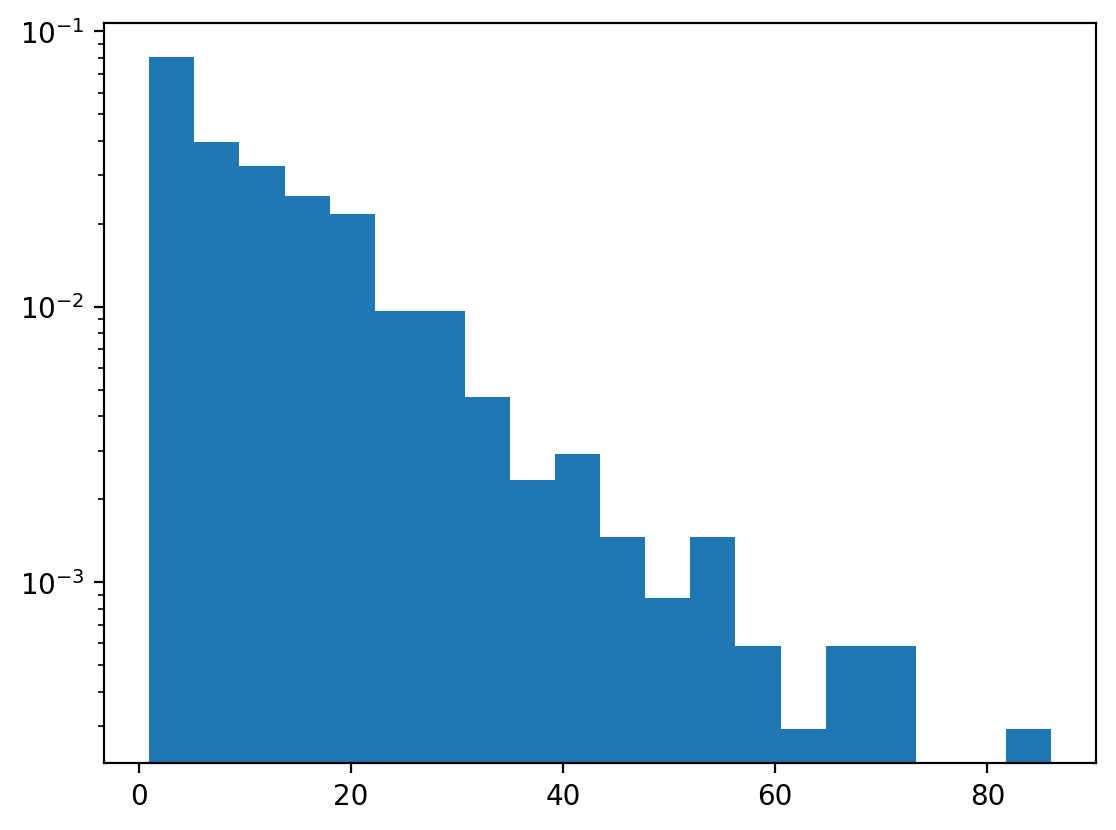

In [63]:
b = np.nonzero(rands)            #返回非零元素的索引值
wait_time = np.diff(b).flatten() #非零元素索引值的差就是中间0的个数
counts, bins, _ = plt.hist(wait_time,bins=20, 
                           density=True, log=True) #等待时间分布的直方图

### (b) 平均正面等待时间是多少?

In [64]:
mean_wait = np.mean(wait_time)                     #平均等待时间
print("平均等待时间是: {:5.2f} 秒".format(mean_wait))

平均等待时间是: 12.42 秒


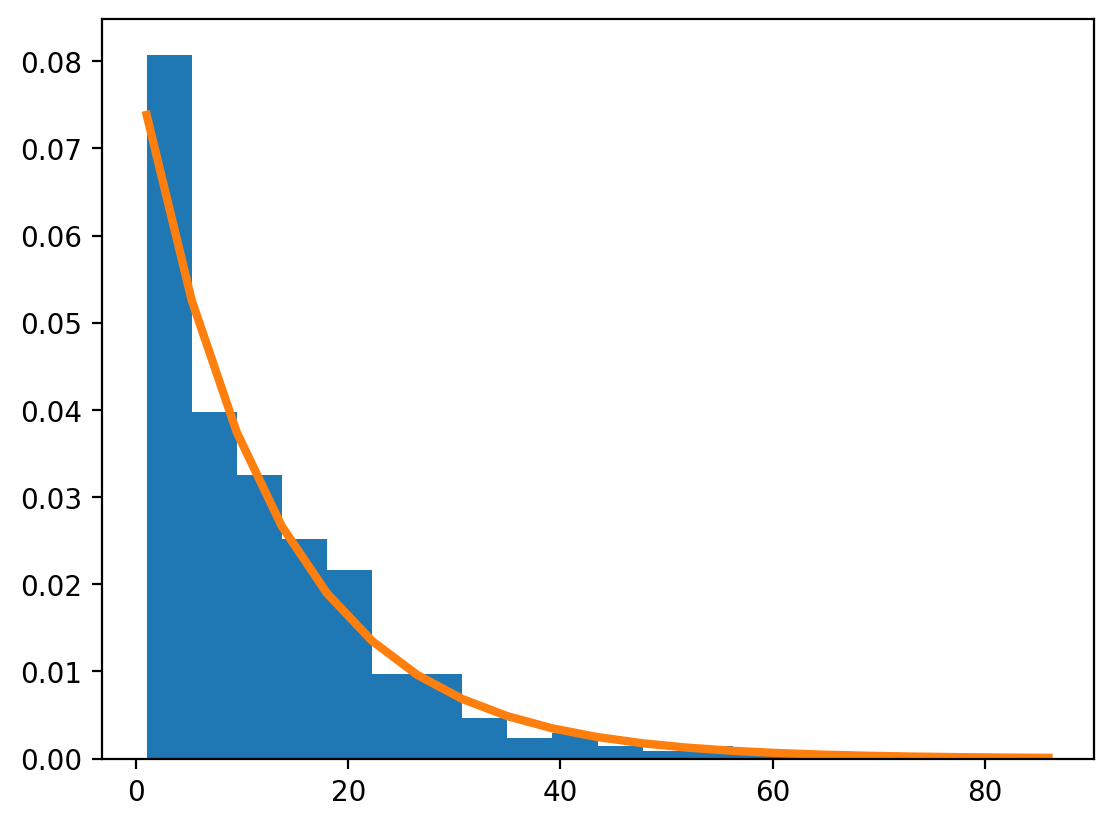

In [66]:
counts, bins, _ = plt.hist(wait_time,bins=20, 
                           density=True)#, log=True) #等待时间分布的直方图
pdf = 1/12.5 * np.exp(-bins/12.5) #指数分布的概率密度函数
plt.plot(bins,pdf, lw=3)

### 关于等待时间的说明

设$Z$是随机变量, 代表事件发生之间的时间间隔, 则$P[Z>t]$的概率即在[0,$t$]时间段内没有事件发生的概率为

$$P(Z>t) = P[N(t)=0]=e^{-\lambda t},$$

所以$Z$的分布函数：

$$F_Z(t)=P(Z<t) = 1-P(Z>t)=1-e^{-\lambda t},$$

$Z$的概率密度函数为

$$F'_Z(t) =f_Z(t) =  \lambda e^{-\lambda t}. $$

所以平均等待时间为

$$E(t) = \int_0^{\infty}\lambda t e^{-\lambda t}dt = 1/\lambda$$

理论上的平均等待时间为$1/\lambda=1/0.08=12.5$秒.